# **1. Importing Libraries**

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
from google.colab import drive

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.metrics import classification_report

# **2. Loading the Dataset**

In [ ]:
# Loading the dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FP1_Diabetes_prediction.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,1,85,66,29,0,26.6,0.351,31,0,1
1,1,89,66,23,94,28.1,0.167,21,0,3
2,5,116,74,0,0,25.6,0.201,30,0,5
3,10,115,0,0,0,35.3,0.134,29,0,7
4,2,197,70,45,543,30.5,0.158,53,1,8


# **3. Exploratory Data Analysis (EDA)**

In [ ]:
print(df.info()) ## Basic info, describes the dataset size and outlines variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               550 non-null    int64  
 1   Glucose                   550 non-null    int64  
 2   BloodPressure             550 non-null    int64  
 3   SkinThickness             550 non-null    int64  
 4   Insulin                   550 non-null    int64  
 5   BMI                       550 non-null    float64
 6   DiabetesPedigreeFunction  550 non-null    float64
 7   Age                       550 non-null    int64  
 8   Outcome                   550 non-null    int64  
 9   Id                        550 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 43.1 KB
None


In [ ]:
print(df.describe()) #Quick Stats Mean, Std, Min, Max

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   550.000000  550.000000     550.000000     550.000000  550.000000   
mean      4.034545  121.560000      69.381818      20.014545   80.141818   
std       3.447325   30.551206      19.036147      15.898006  115.429640   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000  100.000000      62.000000       0.000000    0.000000   
50%       3.000000  119.000000      72.000000      22.000000   22.500000   
75%       6.000000  141.000000      80.000000      32.000000  128.750000   
max      17.000000  197.000000     122.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  \
count  550.000000                550.000000  550.000000  550.000000   
mean    31.902000                  0.466582   33.590909    0.354545   
std      7.822178                  0.320054   12.054140    0.478811   
min      0.000000              

In [ ]:
print(df.isnull().sum()) # Check missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Id                          0
dtype: int64


# **4. Visualization**

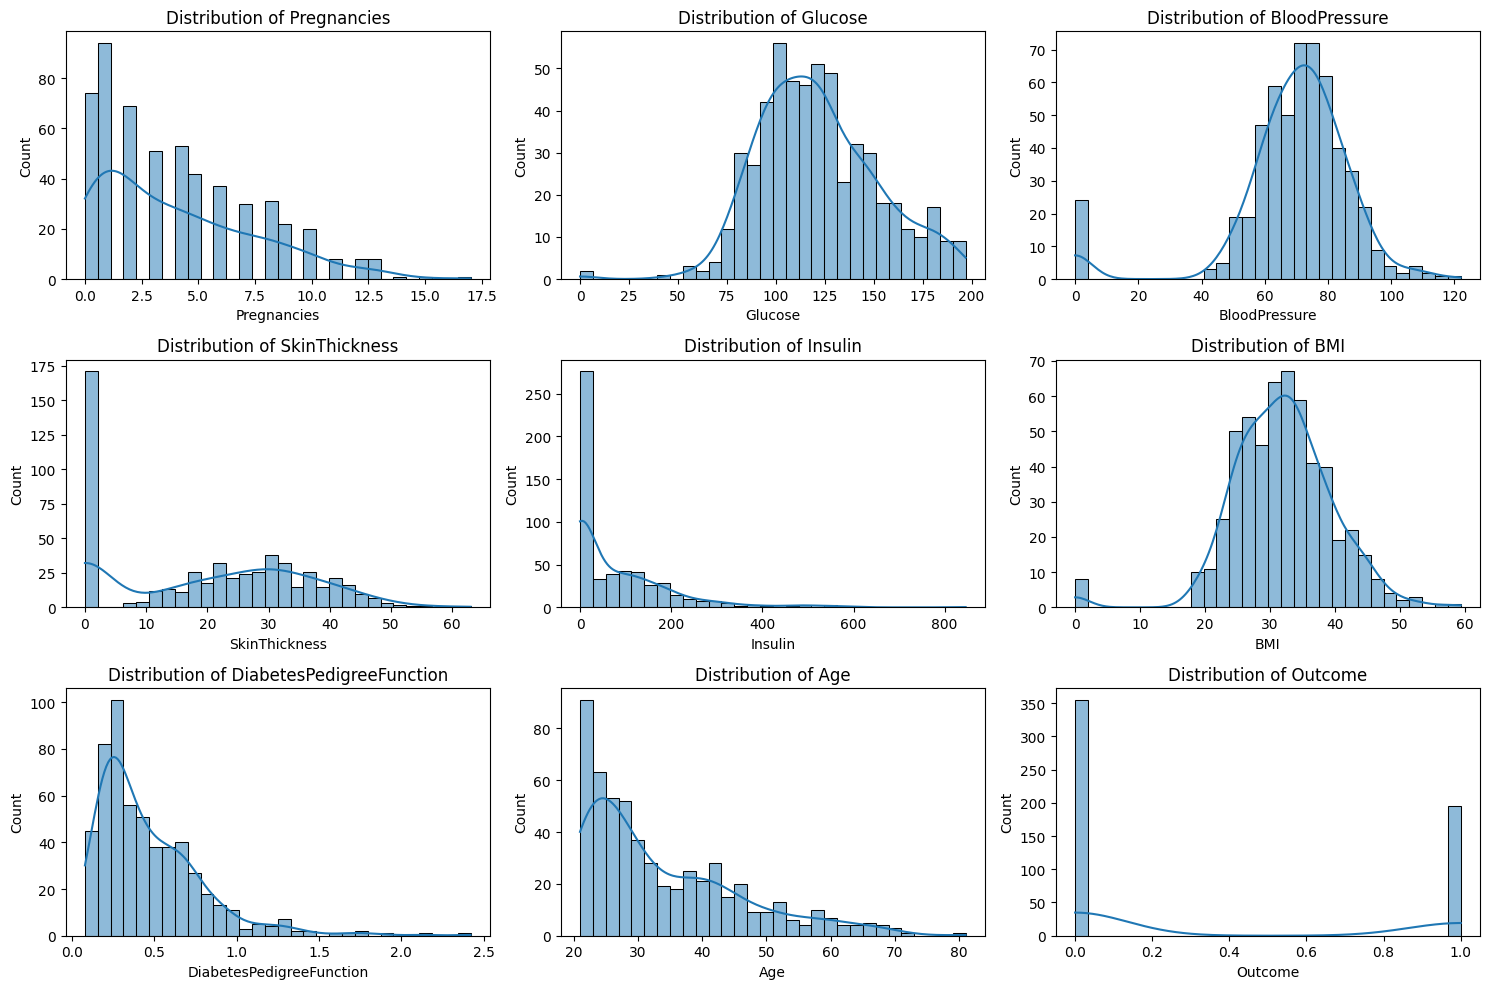

In [ ]:
# 1. Distribution/Histogram of features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

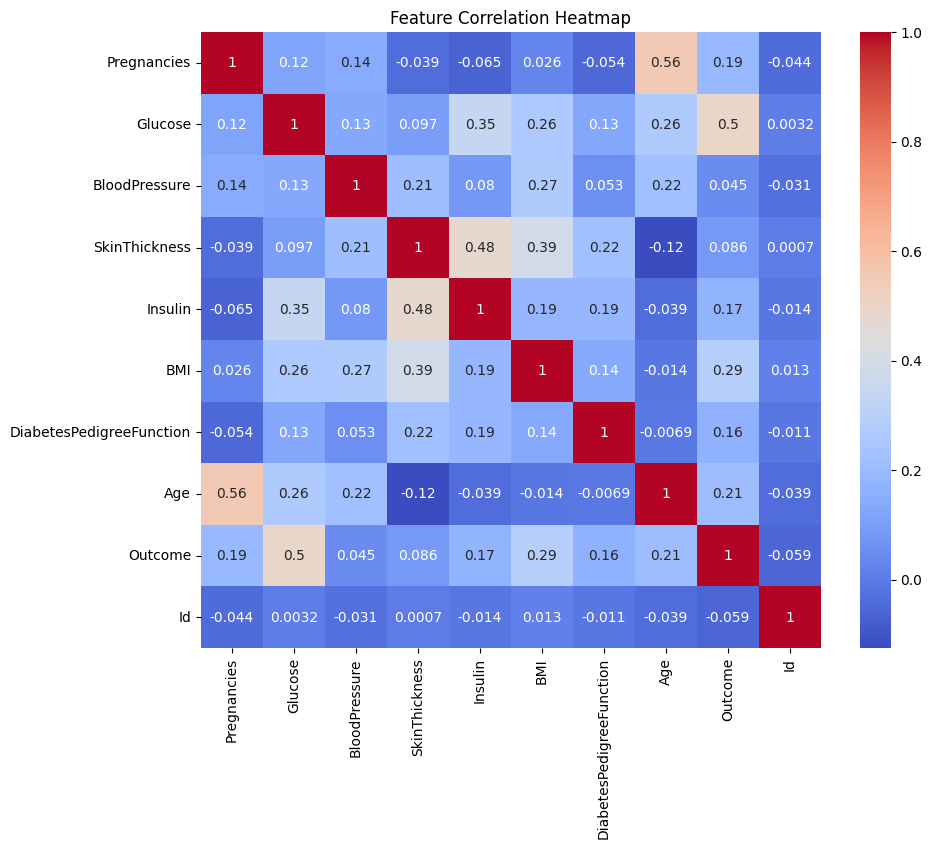

In [ ]:
#2. Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

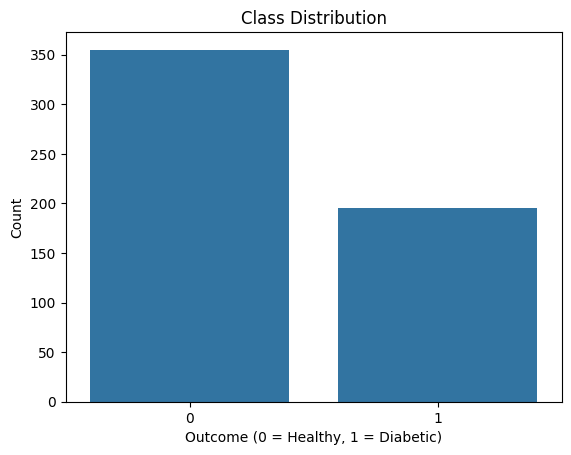

In [ ]:
#3. Class Balance Plot, visualizes the instances of 0 and 1 for outcome variable
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.xlabel('Outcome (0 = Healthy, 1 = Diabetic)')
plt.ylabel('Count')
plt.show()

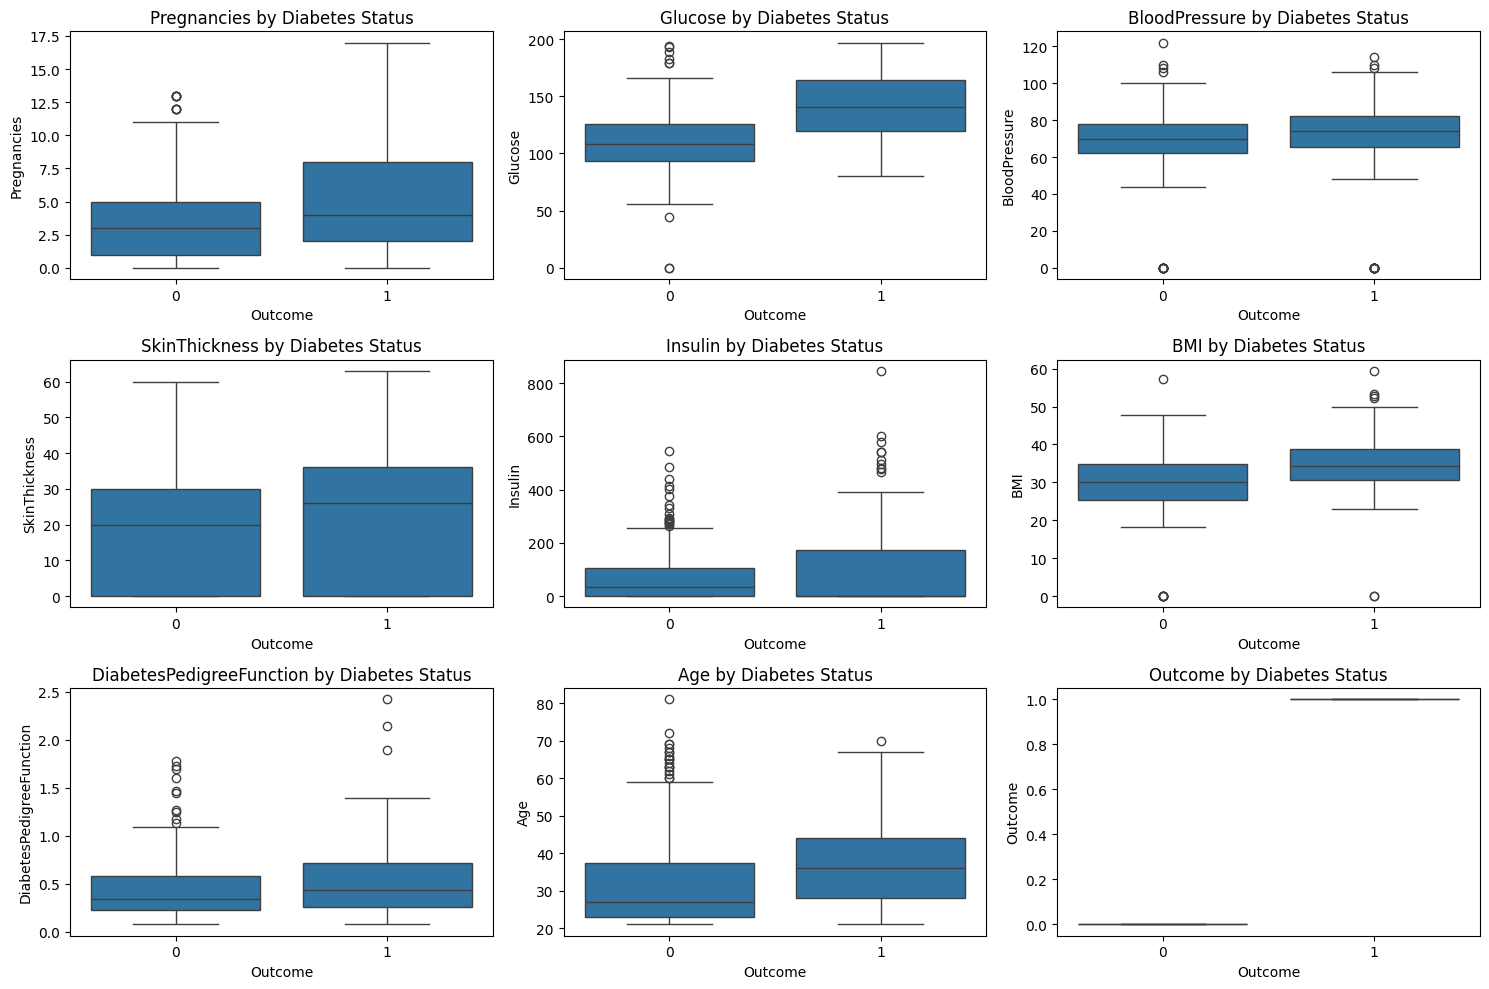

In [ ]:
# 4. Boxplots to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} by Diabetes Status')
plt.tight_layout()
plt.show()

# **5. Prepare Features and Labels**

In [ ]:
# Split data into features and targe
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# **6. Standardize Features**

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **7. Initialize Models**

In [ ]:
# Initialize models
models = {
    'Support Vector Machine': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# **8. 10-Fold Cross-Validation and Evaluation**

In [ ]:
# 10-fold cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Metrics to evaluate
metrics = ['accuracy', 'f1', 'precision', 'recall']

# Evaluate models
results = []
for name, model in models.items():
    scores = {m: cross_val_score(model, X_scaled, y, cv=cv, scoring=m).mean() for m in metrics}
    results.append([name, scores['accuracy'], scores['f1'], scores['precision'], scores['recall']])

# Create and display results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])
results_df = results_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

# **9. Display results table**

In [ ]:
#Display the result table
print("\nPerformance Comparison:\n")
print(results_df.round(4))


Performance Comparison:

                    Model  Accuracy  F1-Score  Precision  Recall
0             Naive Bayes    0.7636    0.6455     0.6968  0.6108
1           Random Forest    0.7618    0.6417     0.7005  0.6100
2     Logistic Regression    0.7600    0.6204     0.7098  0.5592
3  Support Vector Machine    0.7509    0.6057     0.6876  0.5487
4     K-Nearest Neighbors    0.7327    0.5952     0.6412  0.5629


# **10. Visual Representation of Accuracy and F1 Scores**

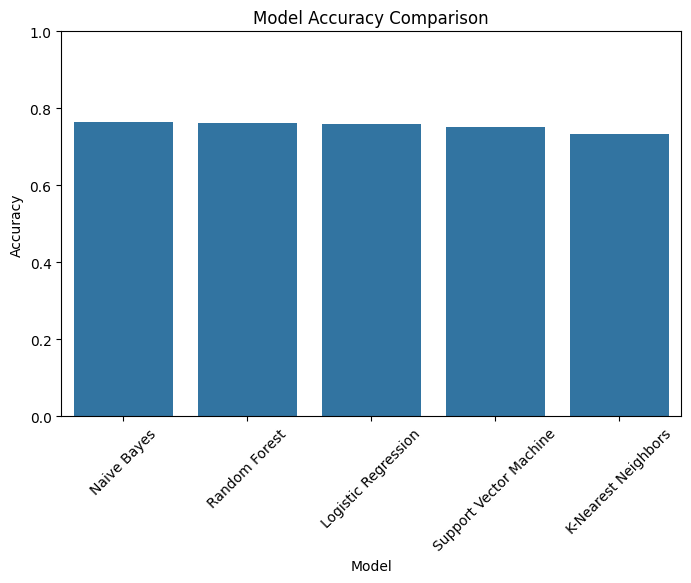

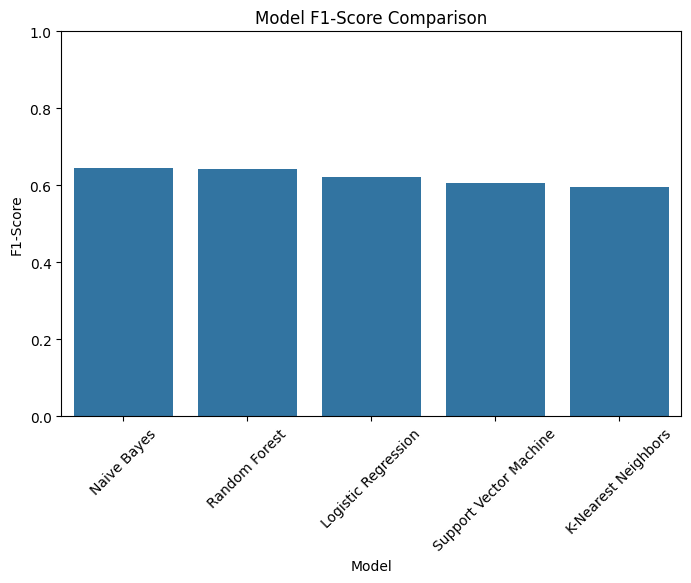

In [ ]:
# Plot of Accuracy
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

#Plot of F1 Scores
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='F1-Score', data=results_df)
plt.title('Model F1-Score Comparison')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

# **11. Classification Reports of All Models on Full Data**

In [ ]:
print("Classification Reports (trained on full data):\n")

for name, model in models.items():
    # Fit model on full data
    model.fit(X, y)

    # Predict on full data
    y_pred = model.predict(X)

    # Print classification report
    print(f"Model: {name}")
    print(classification_report(y, y_pred, digits=4))
    print("-" * 60)

Classification Reports (trained on full data):

Model: Support Vector Machine
              precision    recall  f1-score   support

           0     0.7183    0.9408    0.8146       355
           1     0.7529    0.3282    0.4571       195

    accuracy                         0.7236       550
   macro avg     0.7356    0.6345    0.6359       550
weighted avg     0.7306    0.7236    0.6879       550

------------------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       355
           1     1.0000    1.0000    1.0000       195

    accuracy                         1.0000       550
   macro avg     1.0000    1.0000    1.0000       550
weighted avg     1.0000    1.0000    1.0000       550

------------------------------------------------------------
Model: Logistic Regression
              precision    recall  f1-score   support

           0     0.7908    0.8732    0.8300